## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

## Loading Data

In [2]:
boston_df = pd.read_csv('HousingData.csv')

## Data Exploration

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
boston_df.fillna(boston_df.mean(), inplace=True)

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<AxesSubplot: >

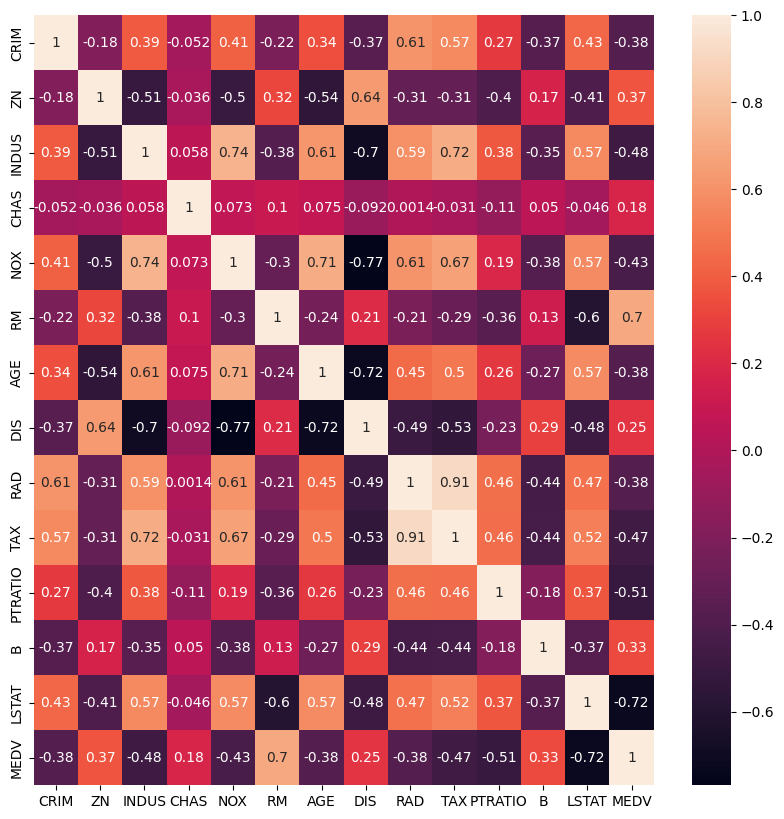

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(boston_df.corr(), annot=True)

In [8]:
boston_df.drop(columns=['INDUS', "NOX"], inplace=True)

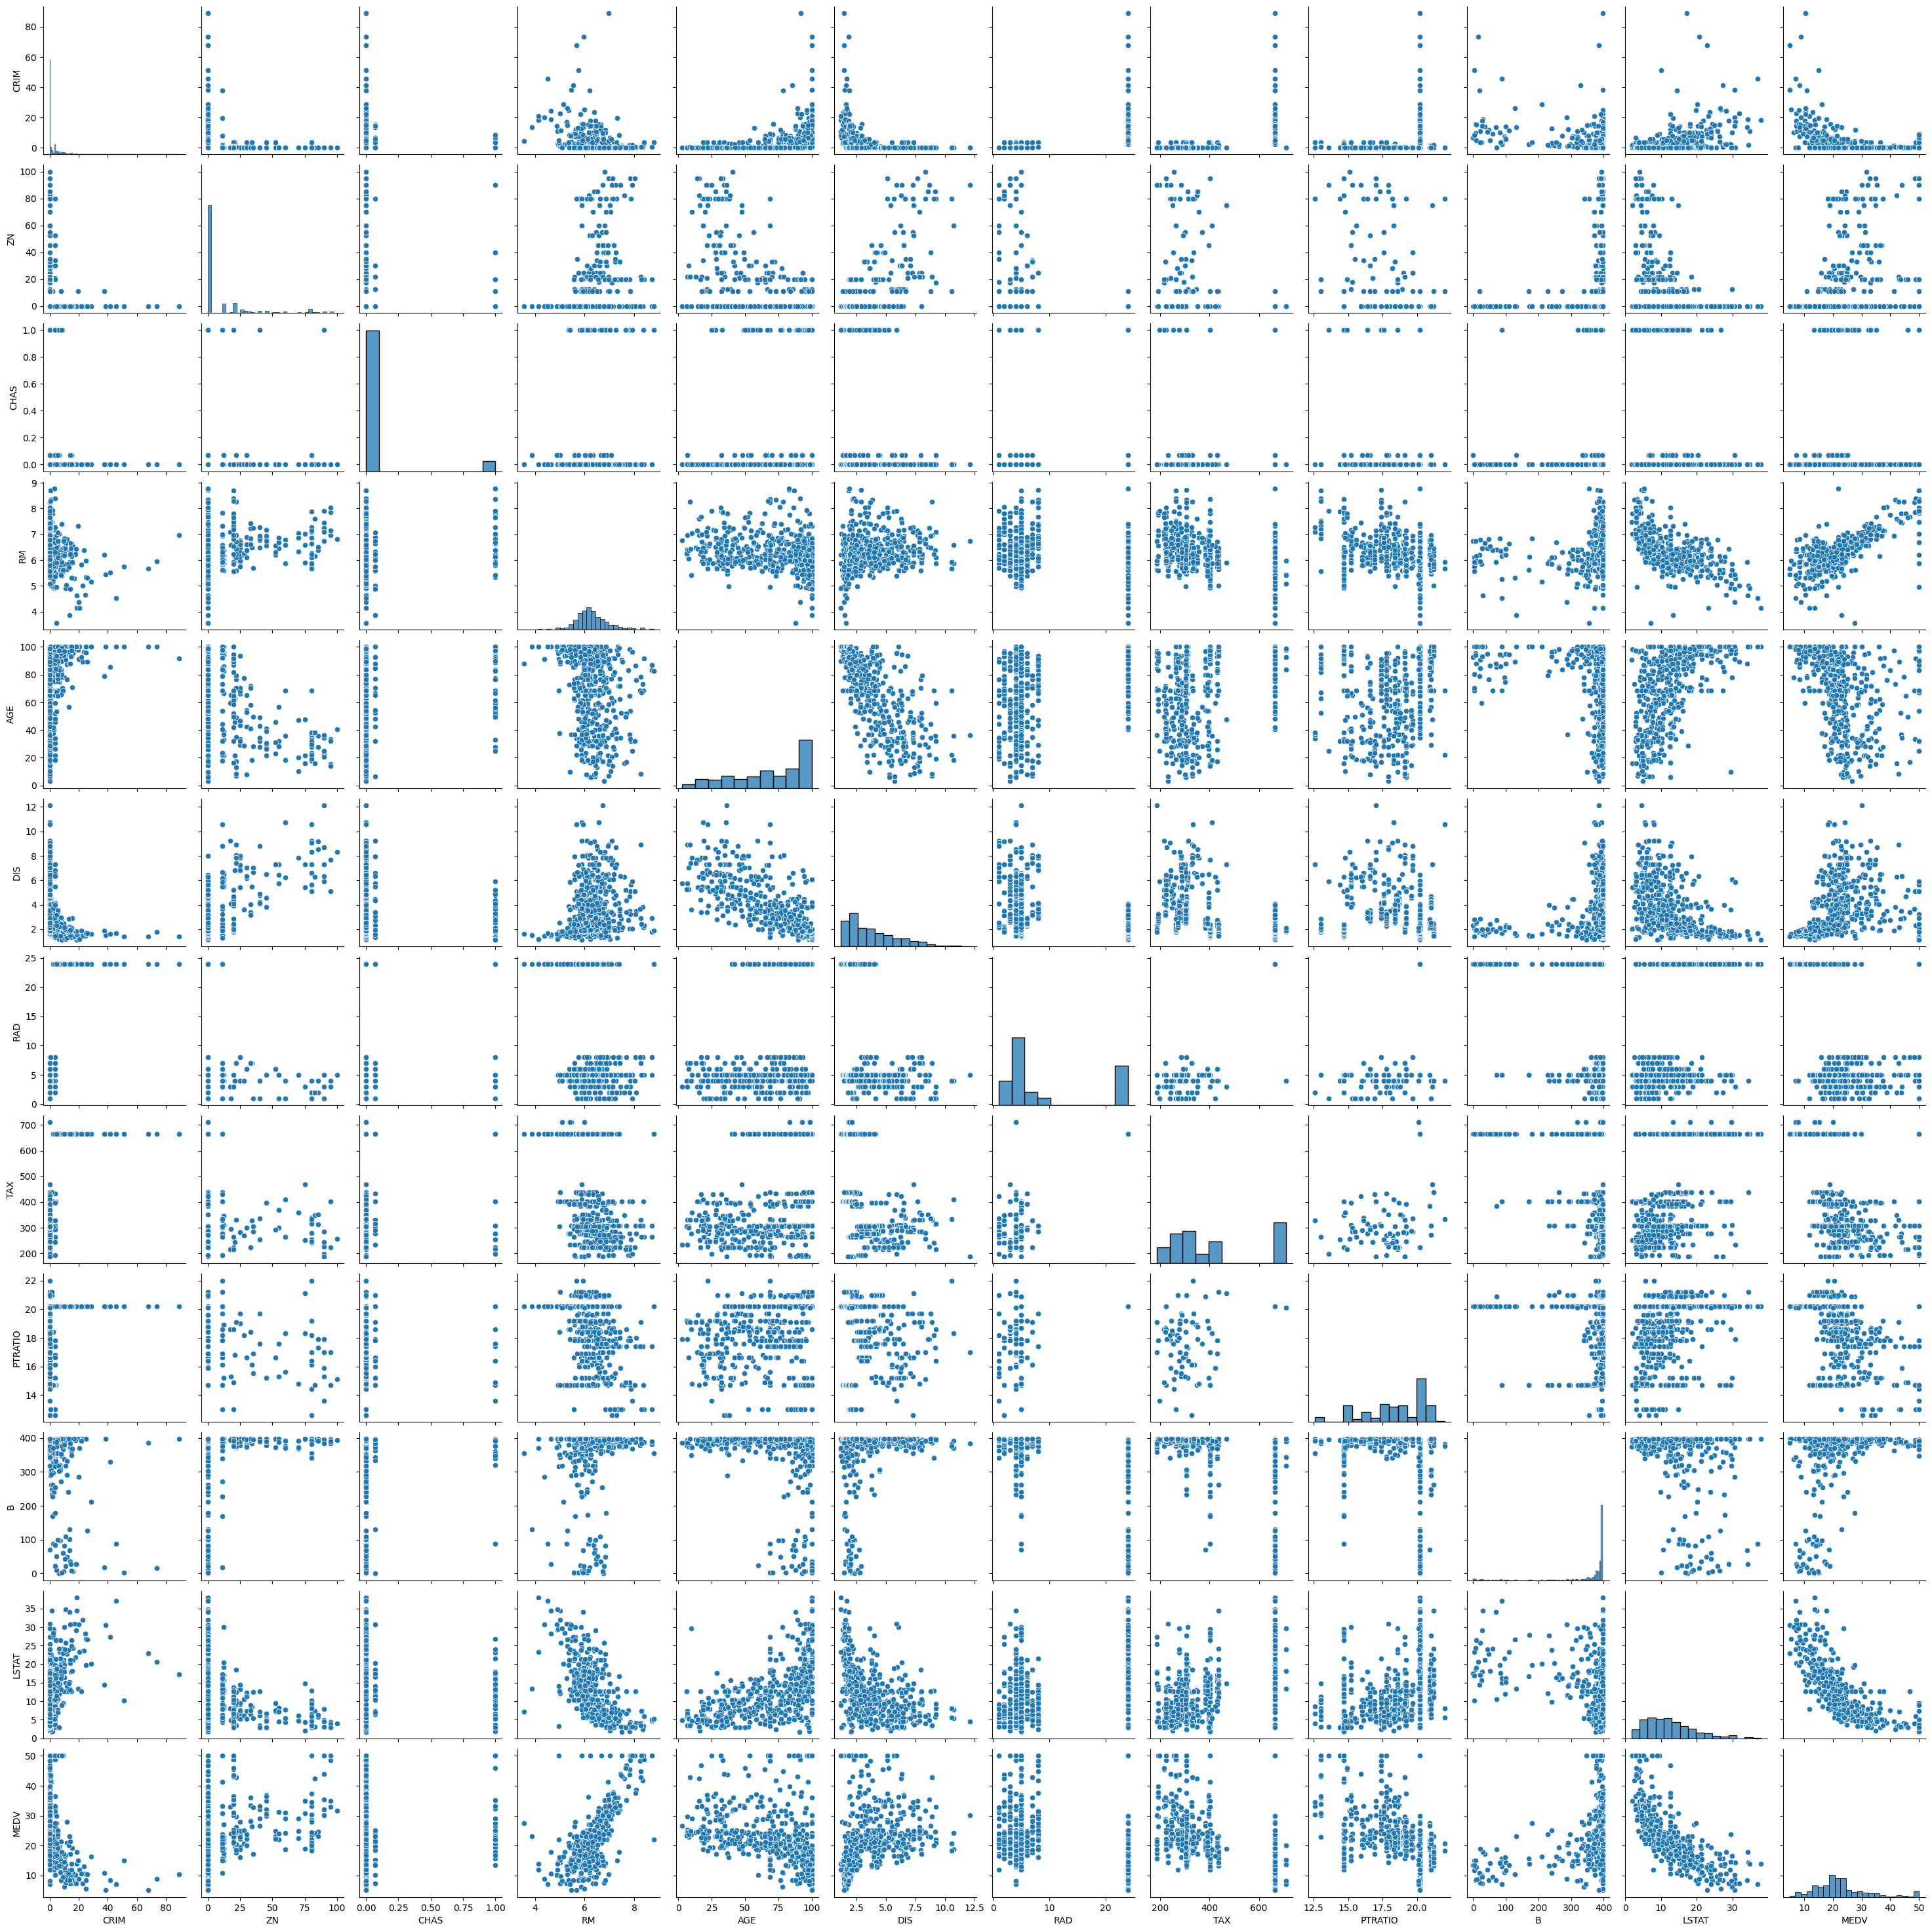

In [9]:
sns.pairplot(boston_df)

## Data Splitting and Scaling

In [10]:
features = boston_df.columns[0:11]
target = boston_df.columns[-1]

In [11]:
X = boston_df[features].values
y = boston_df[target].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)


print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

The dimension of X_train is (354, 11)
The dimension of X_test is (152, 11)


In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

### Linear Regression

In [14]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [15]:
# predict

prediction = lr.predict(X_test)

actual = y_test

In [16]:
train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

The train score for lr model is 0.7075949216264228
The test score for lr model is 0.7386223748055082


### Ridge Regression

In [17]:
# Ridge Regression Model

ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train, y_train)

# train and test score for ridge regression

train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("Ridge Model........................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

Ridge Model........................................

The train score for ridge model is 0.7066480980507175
The test score for ridge model is 0.7361100589221541


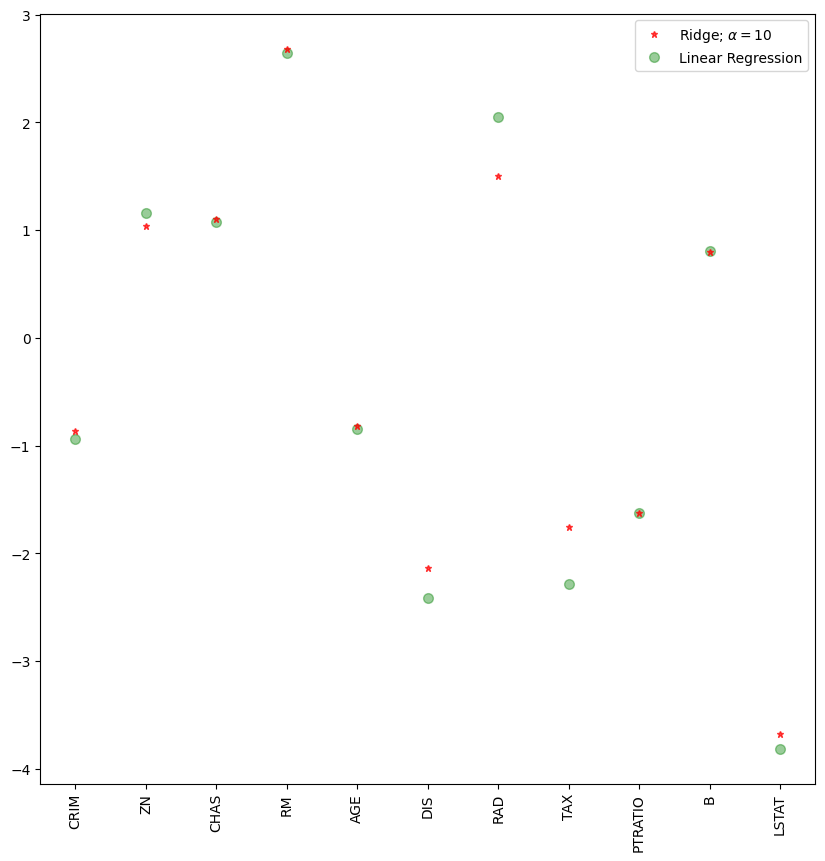

In [18]:
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

### Lasso Regression

In [19]:
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)

train_score_ls = lasso.score(X_train, y_train)
test_score_ls = lasso.score(X_test, y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))

The train score for ls model is 0.0
The test score for ls model is -0.0030704836212473996


<AxesSubplot: >

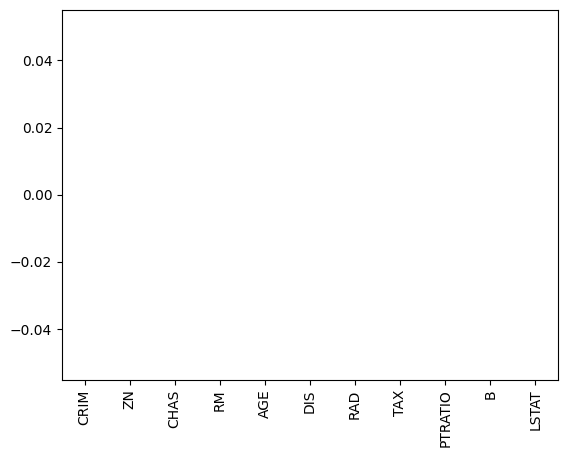

In [20]:
pd.Series(lasso.coef_, features).sort_values(ascending = True).plot(kind = "bar")

## Selecting Optimal Aplha Values using Cross-Validation

To try out different aplha values to find the optimal contraint value.

`from sklearn.linear_model import LassoCV`

imports the cross-validation model

This will try out different combinationas of alpha values and then choose the best model

In [21]:
from sklearn.linear_model import LassoCV


lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)

print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

0.7075949170596927
0.7386209689040742


Comparing the coefficients from the lasso model with the rest of the models

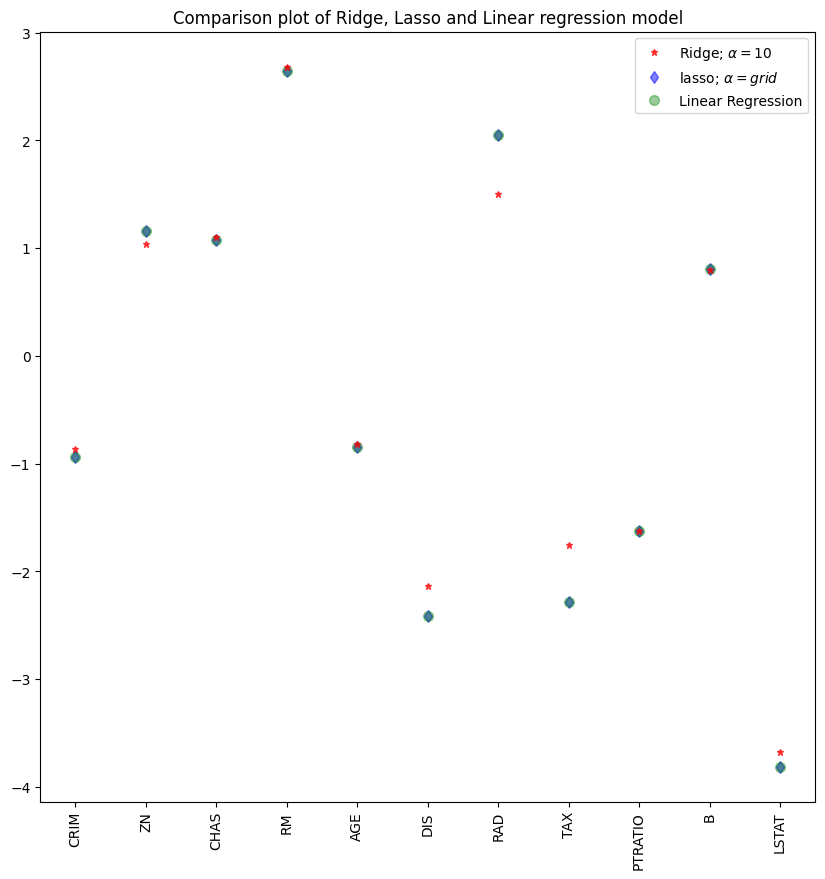

In [22]:
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#add plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)

plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()

Optimizing rigde to find the most optimal alpha value

In [23]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

The train score for ridge model is 0.7066480980507177
The train score for ridge model is 0.7361100589221513
